In [1]:
import cobra
import os
import glob
import pandas as pd
from matplotlib_venn import venn2, venn2_circles

# Matplotlib defaults
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mticker
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams['figure.dpi'] = 300
#Rivanna fonts should include sans-serif now, but this could still raise an error
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

SMALLER_SIZE = 8
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
model_dict_json = dict()
path = "/home/mac9jc/paradigm/models/"
os.chdir(path)

for filename in glob.glob(os.path.join(path, 'final_denovo_*.json')):
    key = filename.split('/')[len(filename.split('/'))-1]
    key = key[:-5]
    key = key[13:]
    model_dict_json[key] = cobra.io.load_json_model(filename)
    
model_dict_gf = dict()
        
for filename in glob.glob(os.path.join(path, 'gf_*.xml')):
    key = filename.split('/')[len(filename.split('/'))-1]
    key = key[:-4]
    key = key[3:]
    if key.startswith('P'):
        key = key #GOOD
    else: key = 'NA'
    if key != 'NA':
        model_dict_gf[key] = cobra.io.read_sbml_model(filename)
        
del model_dict_json['TgondiiRH'] #del model_dict_gf['TgondiiRH']
del model_dict_json['GintestinalisAssemblageAWB'] #del model_dict_gf['GintestinalisAssemblageAWB']
del model_dict_json['Pvivax-likePvl01']

In [3]:
def rename_organisms(file_o_genes):
    
    #model_dict_gf['LmajorSD75.1'] = model_dict_gf.pop('LmajorSD75')
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('. ','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace(' strain ','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('strain','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('subsp','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('str','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace(' ','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace(':','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('-','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('/','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('isolate','', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('strain','', regex=False)
    
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Acanthamoeba', 'A', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Plasmodium', 'P', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Cryptosporidium', 'C', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Babesia', 'B', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Besnoitia', 'B', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Trypanosoma', 'T', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Chromera', 'C', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Eimeria', 'E', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Gregarina', 'G', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Giardia', 'G', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Hammondia', 'H', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Entamoeba', 'E', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Leishmania', 'L', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Leptomonas', 'L', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Toxoplasma', 'T', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Trichomonas', 'T', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Mitosporidium', 'M',1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Neospora', 'N', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Naegleria', 'N', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Encephalitozoon', 'E', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Enterospora', 'E', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Hepatospora', 'H', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Vittaforma', 'V', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Cystoisospor', 'C', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Sarcocystis', 'S', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Paratrypanosoma', 'P', 1)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Theileria', 'T', 1)

    
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('LdonovaniCLSL','LdonovaniCL-SL', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('EhistolyticaHM1IMSSA','EhistolyticaHM1IMSS-A', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('AcastellaniistrNeff','AcastellaniiNeff', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('TcruziCLBrenerNonEsmeraldolike','TcruziCLBrenerNon-Esmeraldo-like', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('NcaninumLiverpool','NcaninumLIV', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('PknowlesiMalayanStrainPk1A','PknowlesiMalayanPk1A', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('TgondiiGAB22007GALDOM2','TgondiiGAB2-2007-GAL-DOM2', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('EcuniculiEcunIIIL','EcuniculiEcunIII-L', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('EhistolyticaHM1IMSSB','EhistolyticaHM1IMSS-B', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('HhammondiH.H.34','HhammondiHH34', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('TcruziSylvioX1012012','TcruziSylvioX10-1-2012', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('BayalaiB08376','BayalaiB08-376', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('TcruziSylvioX101','TcruziSylvioX10-1', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('TcruziCLBrenerEsmeraldolike','TcruziCLBrenerEsmeraldo-like', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('GAssemblageBGS','GintestinalisAssemblageBGS', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('GAssemblageBGS_B','GintestinalisAssemblageBGS_B', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('GAssemblageEP15','GintestinalisAssemblageEP15', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('TbruceibruceiTREU927','TbruceiTREU927', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('PrelictumSGS1like','PrelictumSGS1-like', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('GAssemblageA2DH','GintestinalisAssemblageADH', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('TbruceiLister4272018','TbruceiLister427_2018', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('PvivaxlikePvl01','Pvivax-likePvl01', regex=False)
    file_o_genes['Organism'] = file_o_genes['Organism'].str.replace('Pfragilenilgiri','PfragileNilgiri', regex=False)
    #gene_file['Organism'] = gene_file['Organism'].str.replace('','TgondiiRH', regex=False)
    #gene_file['Organism'] = gene_file['Organism'].str.replace('','GintestinalisAssemblageAWB', regex=False)
    
    return(file_o_genes)

def id_genes_not_in_model(model_dict, file_o_genes, model_genes_denovo_input, model_genes_gf_input):
    
    # model_dict: dictionary of models with keys being the species ID and values are filled with the model
    # the input for this script will typically be the de novo models

    gene_in_model = dict()
    gene_in_model_gf = dict()

    for species, model in model_dict.items():

        #subset gene_file for species
        temp_gene_file = file_o_genes[file_o_genes['Organism'].str.lower() == species.lower()]

        #preallocate - DE NOVO MODEL
        species_gene_not_in_model = dict()
        model_version = 'de novo'

        #assess genes - DE NOVO MODEL
        for row in temp_gene_file.iterrows():
            row_use = row[1]
            gene = row_use['Gene ID']
            EC = row_use['EC numbers']
            name = row_use['Product Description']
            GO2 = row_use['Curated GO Functions']
            GO1 = row_use['Computed GO Functions']
            if gene not in model_genes_denovo_input[species]: present = False 
            else: present = True # gene in model
            gene_in_model[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2, 'present':present}

        #preallocate - GAPFILLED MODEL
        species_gene_not_in_model = dict()
        species_count_with_EC = 0
        model_version = 'gf'

        #get other model
        if species in model_dict_gf.keys():
            #assess genes - GAPFILLED MODEL
            for row in temp_gene_file.iterrows():
                row_use = row[1]
                gene = row_use['Gene ID']
                EC = row_use['EC numbers']
                name = row_use['Product Description']
                GO2 = row_use['Curated GO Functions']
                GO1 = row_use['Computed GO Functions']
                if gene not in model_genes_gf_input[species]: present = False
                else: present = True # gene in model
                gene_in_model_gf[gene] = {'species':species,'model_version':model_version,'EC':EC, 'name':name,'GO, curated':GO1,'GO, computed':GO2, 'present':present}

    output1 = pd.DataFrame.from_dict(gene_in_model, orient='index')
    output1 = output1.rename(columns = {'index':'gene'})
    output2 = pd.DataFrame.from_dict(gene_in_model_gf, orient='index')
    output2 = output2.rename(columns = {'index':'gene'})
    output = output1.append(output2, ignore_index=False)
    
    return(output)


def get_gene_options(model_input):
    
    # this was heavily checked... but may need to change with EUPathDB updates - to do that, uncomment out the last line and see if anything looks funny
    model_genes = list()
    for g in model_input.genes:
        gene_id = g.id
        if gene_id[0:4] == 'rna_': gene_id = gene_id.replace('rna_', '') 
        if gene_id[0:6] == 'mRNA1_': gene_id = gene_id.replace('mRNA1_', '')
        if '.?-p1' in gene_id: gene_id = gene_id.split('.?-p1')[0]
        if ':' in gene_id: gene_id = gene_id.split(':')[0]
        if "-t" in gene_id: gene_id = gene_id.split('-t')[0]
        if "." in gene_id: gene_id = gene_id.split('.')[0]
        if "-RA-p1" in gene_id: gene_id = gene_id.split('-RA-p1')[0]
        if "-1-p1" in gene_id: gene_id = gene_id.split('-1-p1')[0]
        if "-T1-p1" in gene_id: gene_id = gene_id.split('-T1-p1')[0]
        if "-p1" in gene_id: gene_id = gene_id.split('-p1')[0]
        model_genes.append(gene_id)
    #if gene_id == g.id: print(gene_id)
                
    return(model_genes)

#HERE

In [4]:
def summarize_df(df_input, model_dict, gene_file_input, model_dict_gf_input, model_genes_denovo_dict_list, model_genes_gf_dict_list):
    
    df_denovo = df_input[df_input['model_version'] == 'de novo']
    df_gf = df_input[df_input['model_version'] == 'gf']
    
    df_denovo_present = df_denovo[df_denovo['present'] == True]
    df_denovo_absent = df_denovo[df_denovo['present'] == False]
    
    df_gf_present = df_gf[df_gf['present'] == True]
    df_gf_absent = df_gf[df_gf['present'] == False]
    
    dict_genes = dict()
    
    for species in model_dict.keys():
        
        
        # All EuPathDB genes
        EuPathDB_genes = set(gene_file_input[gene_file_input['Organism'] == species]['Gene ID'])
        # EuPathDB genes that WERE in de novo model
        EuPathDB_genes_in_denovo = set(df_denovo_present[df_denovo_present['species'] == species].index)
        # EuPathDB genes that WERE NOT in de novo model
        EuPathDB_genes_NOT_in_denovo = set(df_denovo_absent[df_denovo_absent['species'] == species].index)

        # All de novo genes
        denovo_genes = set(model_genes_denovo_dict_list[species])
        # De novo genes on EuPathDB (same list as EuPathDB_genes_in_denovo)
        denovo_on_EuPathDB = denovo_genes.intersection(EuPathDB_genes)
        # De novo genes NOT on EuPathDB
        unique_to_denovo = denovo_genes.difference(EuPathDB_genes)

        # check lists
        if len(denovo_on_EuPathDB.difference(EuPathDB_genes_in_denovo)) > 0 or len(EuPathDB_genes_in_denovo.difference(denovo_on_EuPathDB)) >0:
            print('error in de novo genes on EuPathDB: ',species)

        if len(EuPathDB_genes_in_denovo) + len(EuPathDB_genes_NOT_in_denovo) == len(EuPathDB_genes): a = 0
        else: print('error in EuPathDB split: ',species)

        if len(unique_to_denovo) + len(denovo_on_EuPathDB) == len(denovo_genes): a = 0
        else: print('error in de novo split: ',species)
        
        if species not in model_dict_gf_input.keys(): 
            N_EuPathDB_genes_in_gf = 'NaN'
            N_EuPathDB_genes_NOT_in_gf = 'NaN'
            N_gf_genes = 'NaN'
            N_gf_on_EuPathDB = 'NaN' # same as EuPathDB_in_gf
            N_unique_to_gf = 'NaN'
        else:
            # EuPathDB genes that WERE in de novo model
            EuPathDB_genes_in_gf = set(df_gf_present[df_gf_present['species'] == species].index)
            # EuPathDB genes that WERE NOT in de novo model
            EuPathDB_genes_NOT_in_gf = set(df_gf_absent[df_gf_absent['species'] == species].index)
            
            # All gf genes
            gf_genes = (set(model_genes_gf_dict_list[species]))
            # gf genes on EuPathDB (same list as EuPathDB_genes_in_gf)
            gf_on_EuPathDB = set(gf_genes.intersection(EuPathDB_genes)) #### HERE
            # gf genes NOT on EuPathDB
            unique_to_gf = set(gf_genes.difference(EuPathDB_genes))
            
            # check lists # ISSUE WITH FIRST TWO
            if len(gf_on_EuPathDB.difference(EuPathDB_genes_in_gf)) > 0 or len(EuPathDB_genes_in_gf.difference(gf_on_EuPathDB)) >0:
                print('gf - error in gf genes on EuPathDB: ',species) # PLASMODIUM ONLY

            if len(EuPathDB_genes_in_gf) + len(EuPathDB_genes_NOT_in_gf) == len(EuPathDB_genes): a = 0
            else: print('gf - error in EuPathDB split: ',species)

            if len(unique_to_gf) + len(gf_on_EuPathDB) == len(gf_genes): a = 0
            else: print('gf - error in de novo split: ',species)
                
            N_EuPathDB_genes_in_gf = len(EuPathDB_genes_in_gf)
            N_EuPathDB_genes_NOT_in_gf = len(EuPathDB_genes_NOT_in_gf)
            N_gf_genes = len(gf_genes)
            N_gf_on_EuPathDB = len(gf_on_EuPathDB)
            N_unique_to_gf = len(unique_to_gf)
            

        dict_genes[species] = {'total EuPathDB genes' : len(EuPathDB_genes),
                               'total de novo genes' : len(denovo_genes),
                               'total semi-curated genes': N_gf_genes,
                               '# in de novo' : len(denovo_on_EuPathDB),
                              '# in semi-curated' : N_gf_on_EuPathDB,
                               '# not in de novo' : len(EuPathDB_genes_NOT_in_denovo),
                              '# not in semi-curated' : N_EuPathDB_genes_NOT_in_gf,
                              '# only in de novo' : len(unique_to_denovo), 
                              '# only in semi-curated' : N_unique_to_gf,
                              
                              'EuPathDB genes' : EuPathDB_genes,
                               'de novo genes' : denovo_genes,
                               'in de novo' : denovo_on_EuPathDB,
                               'not in de novo' : EuPathDB_genes_NOT_in_denovo,
                              'only in de novo' : unique_to_denovo} 
        
    df_use = pd.DataFrame.from_dict(dict_genes, orient='index')

    return(df_use)

In [5]:
model_genes_denovo = dict()
model_genes_gf = dict()
for species, model in model_dict_json.items():
    model_genes_denovo[species] = get_gene_options(model)
for species, model in model_dict_gf.items():
    model_genes_gf[species] = get_gene_options(model)

In [6]:
gene_file = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerms_metabolic_process.txt', sep="\t")
gene_file = rename_organisms(gene_file)
df = id_genes_not_in_model(model_dict_json, gene_file, model_genes_denovo, model_genes_gf)
data_all = summarize_df(df, model_dict_json,  gene_file, model_dict_gf, model_genes_denovo, model_genes_gf)

In [7]:
data_all.head()

print(sum(~(data_all['total EuPathDB genes'] == data_all['# in de novo'] + data_all['# not in de novo'])))
print(sum(~(data_all['total de novo genes'] == data_all['# in de novo'] + data_all['# only in de novo'])))
semi = data_all[~(data_all['total semi-curated genes'] == 'NaN')]
print(sum(~(semi['total semi-curated genes'] == semi['# in semi-curated'] + semi['# only in semi-curated'])))

0
0
0


In [8]:
gene_file.head()

,Gene ID,source_id,Organism,Genomic Location (Gene),Product Description,Curated GO Functions,Computed GO Functions,Evidence Code,EC numbers,Unnamed: 9
0,13J3.01,13J3.01:pseudogenic_transcript,TbruceiLister427,"TP13J3:2..1,608(+)","RNA polymerase III pseudogene, possible",NaN,DNA binding;DNA-directed 5'-3' RNA polymerase ...,IEA,NaN,NaN
1,A0H76_1008,A0H76_1008-t39_1,Heriocheircanceri,LTAI01001543:94..426(-),hypothetical protein,NaN,DNA binding,IEA,NaN,NaN
2,A0H76_1010,A0H76_1010-t39_1,Heriocheircanceri,"LTAI01000224:128..2,734(-)",CLPB,NaN,ATP binding,IEA,NaN,NaN
3,A0H76_1016,A0H76_1016-t39_1,Heriocheircanceri,"LTAI01000225:1,943..3,181(+)",PRI2,NaN,DNA primase activity,IEA,NaN,NaN
4,A0H76_102,A0H76_102-t39_1,Heriocheircanceri,"LTAI01000106:1,899..2,147(+)",RS28,NaN,structural constituent of ribosome,IEA,NaN,NaN


In [9]:
# # for text in response to reviewers
# temp = df[(df['model_version'] =='de novo') & (df['species'] =='TgondiiME49')]
# print(temp.loc['TGME49_321660']['GO, curated'])
# print(temp.shape)
# #temp
# temp[pd.notna(temp['EC'])]

In [10]:
# percent of genes that have GO terms and EC and are not in model
df_denovo = df[df['model_version'] =='de novo']
df_gf = df[df['model_version'] =='gf']
dict_genes_temp = dict()
dict_genes = dict()
for species in model_dict_json.keys():
    species_df = gene_file[gene_file['Organism'] == species]
    N_EuPathDB_genes_withoutEC = species_df[species_df['EC numbers'] != species_df['EC numbers']].shape[0]
    percent_EuPathDB_genes_withoutEC = 100* N_EuPathDB_genes_withoutEC/species_df.shape[0]
    species_denovo_df = df_denovo[df_denovo['species'] == species]
    N_missing_from_denovo_withoutEC = species_denovo_df[species_denovo_df['EC'] != species_denovo_df['EC']].shape[0]
    percent_missing_from_denovo_withoutEC = 100* N_missing_from_denovo_withoutEC/species_denovo_df.shape[0]
    species_gf_df = df_gf[df_gf['species'] == species]
    N_missing_from_gf_withoutEC = species_gf_df[species_gf_df['EC'] != species_gf_df['EC']].shape[0]
    if species not in model_dict_gf.keys(): 
        N_missing_from_gf = 'NaN'
        percent_missing_from_gf_withoutEC = 'NaN'
    else:
        percent_missing_from_gf_withoutEC = 100* N_missing_from_gf_withoutEC/species_gf_df.shape[0]
    dict_genes[species] = {'all annotations' : percent_EuPathDB_genes_withoutEC,
                           'omitted from\nde novo' : percent_missing_from_denovo_withoutEC,
                          'omitted from\nsemi-curated' : percent_missing_from_gf_withoutEC}
    dict_genes_temp[species] = {'all annotations' : N_EuPathDB_genes_withoutEC,
                           'omitted from\nde novo' : N_missing_from_denovo_withoutEC,
                          'omitted from\nsemi-curated' : N_missing_from_gf_withoutEC}
    
EC_data = pd.DataFrame.from_dict(dict_genes, orient='index')
EC_data.head()


,all annotations,omitted from de novo,omitted from semi-curated
AalgeraePRA109,100.000000,100.000000,NaN
AalgeraePRA339,85.234899,85.234899,NaN
AcastellaniiNeff,88.357983,88.357983,NaN
AspWSBS2006,100.000000,100.000000,NaN
BayalaiB08-376,100.000000,100.000000,NaN


In [11]:
# how to subset all de novo genes to be just amino acid???
# for now, just drop those columns

gene_file2 = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerms_amino_acid.txt', sep="\t")
gene_file2 = rename_organisms(gene_file2)
df2 = id_genes_not_in_model(model_dict_json, gene_file2, model_genes_denovo, model_genes_gf)
data_amino = summarize_df(df2, model_dict_json,  gene_file2, model_dict_gf, model_genes_denovo, model_genes_gf)
data_amino = data_amino[["total EuPathDB genes","# in de novo","# not in de novo","# in semi-curated","# not in semi-curated"]]
data_amino.head()

,total EuPathDB genes,# in de novo,# not in de novo,# in semi-curated,# not in semi-curated
AalgeraePRA109,35,34,1,NaN,NaN
AalgeraePRA339,23,23,0,NaN,NaN
AcastellaniiNeff,110,102,8,NaN,NaN
AspWSBS2006,28,28,0,NaN,NaN
BayalaiB08-376,53,50,3,NaN,NaN


In [12]:
gene_file3 = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerm_nucleotide.txt', sep="\t")
gene_file3 = rename_organisms(gene_file3)
df3 = id_genes_not_in_model(model_dict_json, gene_file3, model_genes_denovo, model_genes_gf)
data_nucleotides = summarize_df(df3, model_dict_json,  gene_file3, model_dict_gf, model_genes_denovo, model_genes_gf)
data_nucleotides = data_nucleotides[["total EuPathDB genes","# in de novo","# not in de novo","# in semi-curated","# not in semi-curated"]]
data_nucleotides.head()

,total EuPathDB genes,# in de novo,# not in de novo,# in semi-curated,# not in semi-curated
AalgeraePRA109,17,17,0,NaN,NaN
AalgeraePRA339,10,10,0,NaN,NaN
AcastellaniiNeff,118,108,10,NaN,NaN
AspWSBS2006,13,13,0,NaN,NaN
BayalaiB08-376,39,33,6,NaN,NaN


In [13]:
gene_file4 = pd.read_csv('/home/mac9jc/paradigm/data/EuPathDB_GOTerms_pyruvate_metabolism.txt', sep="\t")
gene_file4 = rename_organisms(gene_file4)
df4 = id_genes_not_in_model(model_dict_json, gene_file4, model_genes_denovo, model_genes_gf)
data_pyruvate = summarize_df(df4, model_dict_json,  gene_file4, model_dict_gf, model_genes_denovo, model_genes_gf)
data_pyruvate = data_pyruvate[["total EuPathDB genes","# in de novo","# not in de novo","# in semi-curated","# not in semi-curated"]]
data_pyruvate.head()

,total EuPathDB genes,# in de novo,# not in de novo,# in semi-curated,# not in semi-curated
AalgeraePRA109,0,0,0,NaN,NaN
AalgeraePRA339,0,0,0,NaN,NaN
AcastellaniiNeff,17,15,2,NaN,NaN
AspWSBS2006,0,0,0,NaN,NaN
BayalaiB08-376,0,0,0,NaN,NaN


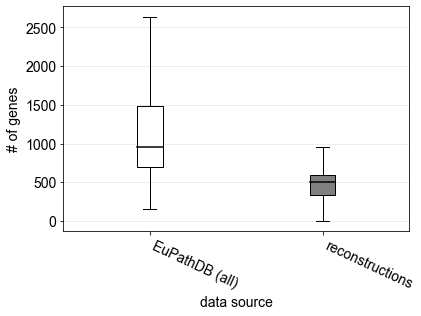

In [14]:
colors = ['white','grey']

# all annotations
fig,ax = plt.subplots()
x1 = data_all['total EuPathDB genes'].tolist()
x2 = data_all['total de novo genes'].tolist()
bplot = ax.boxplot([x1,x2],
                   showfliers=False, patch_artist=True,
                   labels = ['total EuPathDB genes', 'total reconstruction genes'],
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
#ax.set_title('All metabolic genes')
plt.xlabel("data source")
plt.ylabel("# of genes")
ax.set_xticklabels(rotation=-25, ha='left', labels = ['EuPathDB (all)','reconstructions'])
plt.subplots_adjust(left = 0.1, bottom = 0.1)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_comparison_all_annotations.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_comparison_all_annotations.png")


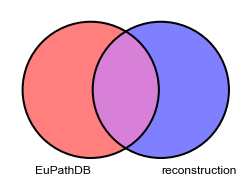

In [15]:
plt.figure()
out = venn2(subsets = (5, 5, 3), set_labels = ('EuPathDB', 'reconstruction'), alpha = 0.5, set_colors = ["red", "blue"])
for idx, subset in enumerate(out.subset_labels):
    out.subset_labels[idx].set_visible(False)
venn2_circles(subsets = (5, 5, 3))
plt.subplots_adjust(left = 0.3,bottom = 0.3)
plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/venn_for_EuPathDB_comparison.png")


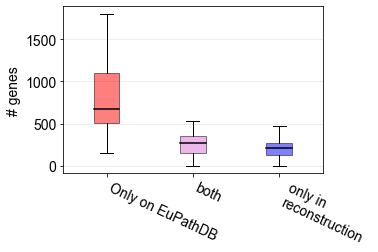

In [16]:
    
# all annotations
fig,ax = plt.subplots()

x1 = data_all['# not in de novo'].tolist()
x2 = data_all['# in de novo'].tolist()
x3 = data_all['# only in de novo'].tolist()
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], ["red","orchid", "blue"]):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
    patch.set_alpha(0.5)
plt.ylabel("# genes")
ax.set_xticklabels(rotation=-25, ha='left', labels = ['Only on EuPathDB','both','only in\nreconstruction'])
plt.subplots_adjust(left = 0.3,bottom = 0.3)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_comparison_all_annotations.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_comparison_all_annotations.png")




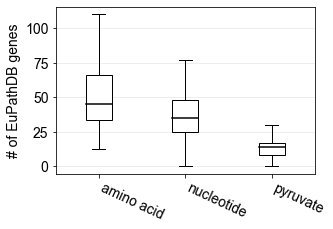

In [17]:
colors = ['white','white','white']

# all annotations
fig,ax = plt.subplots()
x1 = data_amino['total EuPathDB genes'].tolist()
x2 = data_nucleotides['total EuPathDB genes'].tolist()
x3 = data_pyruvate['total EuPathDB genes'].tolist()
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
#plt.xlabel("example pathways")
plt.ylabel("# of EuPathDB genes")
ax.set_xticklabels(rotation=-25, ha='left', labels = ['amino acid','nucleotide','pyruvate'])
plt.subplots_adjust(left = 0.3,bottom = 0.3)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_pathways.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_pathways.png")



In [18]:
data_pyruvate[data_pyruvate['total EuPathDB genes']==0]
print(data_pyruvate[data_pyruvate['total EuPathDB genes']==0].shape)
print(data_pyruvate.shape)

(43, 5)
(189, 5)


In [19]:
data_nucleotides[data_nucleotides['total EuPathDB genes']==0]

,total EuPathDB genes,# in de novo,# not in de novo,# in semi-curated,# not in semi-curated
TcruziCLBrener,0,0,0,NaN,NaN


In [20]:
data_amino[data_amino['total EuPathDB genes']==0]

,total EuPathDB genes,# in de novo,# not in de novo,# in semi-curated,# not in semi-curated


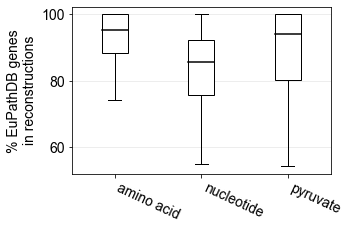

In [21]:
colors = ['white','white','white']

# remove models with no records
data_nucleotides_no_zeros = data_nucleotides[data_nucleotides['total EuPathDB genes']>0]
data_pyruvate_no_zeros = data_pyruvate[data_pyruvate['total EuPathDB genes']>0]
        
# all annotations
fig,ax = plt.subplots()
x1 = [100 * i / j for i, j in zip(data_amino['# in de novo'].tolist(), data_amino['total EuPathDB genes'].tolist())]
x2 = [100 * i / j for i, j in zip(data_nucleotides_no_zeros['# in de novo'].tolist(), data_nucleotides_no_zeros['total EuPathDB genes'].tolist())]
x3 = [100 * i / j for i, j in zip(data_pyruvate_no_zeros['# in de novo'].tolist(), data_pyruvate_no_zeros['total EuPathDB genes'].tolist())]
bplot = ax.boxplot([x1,x2,x3],
                   showfliers=False, patch_artist=True,
                   medianprops = dict(color="black",linewidth=1.5)) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
#plt.xlabel("example pathways")
plt.ylabel("% EuPathDB genes\nin reconstructions")
ax.set_xticklabels(rotation=-25, ha='left', labels = ['amino acid','nucleotide','pyruvate'])
plt.subplots_adjust(left = 0.3,bottom = 0.3)
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_comparison_pathways.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/new_EuPathDB_comparison_pathways.png")


